In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel("Data_Train.xlsx")
data.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,Null,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,Null,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,Null,8625


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.describe(include='O').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,Null,8347


In [6]:
for cols in data.columns:
    print(f"the unique values in {cols} column are : {len(data[cols].unique())} ",data[cols].unique(), sep="\n")

the unique values in Airline column are : 12 
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
the unique values in Date_of_Journey column are : 44 
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
the unique values in Source column are : 5 
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
the unique values in Destination column are : 6

In [7]:
def clean_airline_name(airline_name):
    suffixes = ['Premium economy', 'Business']
    for suffix in suffixes:
        if airline_name.endswith(suffix):
            return airline_name[:-len(suffix)].strip()
    return airline_name

In [8]:
data['Airline'] = data['Airline'].apply(clean_airline_name)

In [9]:
data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [10]:
def datapreprocessing(df):
    
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    
    df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

    df['Journey_Day'] = df['Date_of_Journey'].dt.day
    df['Journey_Month'] = df['Date_of_Journey'].dt.month
    df['Journey_weekday'] = df['Date_of_Journey'].dt.weekday
    
    df["Dep_hour"] = df["Dep_Time"].str.split(":").str[0]
    df["Dep_min"] = df["Dep_Time"].str.split(":").str[1]
    
    df["Arrival_Time"] = df["Arrival_Time"].str.split(" ").str[0]
    df["Arrival_hour"] = df["Arrival_Time"].str.split(":").str[0]
    df["Arrival_min"] = df["Arrival_Time"].str.split(":").str[1]
    
    df["Total_Stops"] = df["Total_Stops"].map({'non-stop':"0", '1 stop':"1", '2 stops':"2", '3 stops':"3", '4 stops':"4", "nan":"2"})
    
    df["Destination"] = np.where(df["Destination"] == "New Delhi", "Delhi", df["Destination"])
    
    df["Duration_hours"] = df["Duration"].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval)
    
    df1 = pd.get_dummies(df, prefix=["Airline","Source","Destination"], columns=["Airline","Source","Destination"], drop_first=True)
    df1.drop(["Date_of_Journey","Route","Dep_Time", "Arrival_Time","Additional_Info"], axis=1, inplace=True)
    return df, df1

In [11]:
data_eda, data_model = datapreprocessing(data)

In [12]:
data_eda

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_weekday,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,0,Null,3897,24,3,6,22,20,01,10,2.833333
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,7662,5,1,5,05,50,13,15,7.416667
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,Null,13882,6,9,4,09,25,04,25,19.000000
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,Null,6218,5,12,3,18,05,23,30,5.416667
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,Null,13302,3,1,3,16,50,21,35,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,Null,4107,4,9,2,19,55,22,25,2.500000
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,Null,4145,27,4,5,20,45,23,20,2.583333
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,Null,7229,27,4,5,08,20,11,20,3.000000
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,Null,12648,3,1,3,11,30,14,10,2.666667


In [13]:
data_model

,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Journey_weekday,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2h 50m,0,3897,24,3,6,22,20,01,10,...,0,0,0,0,0,0,0,1,0,0
1,7h 25m,2,7662,5,1,5,05,50,13,15,...,0,0,0,0,1,0,0,0,0,0
2,19h,2,13882,6,9,4,09,25,04,25,...,0,0,0,1,0,0,1,0,0,0
3,5h 25m,1,6218,5,12,3,18,05,23,30,...,0,0,0,0,1,0,0,0,0,0
4,4h 45m,1,13302,3,1,3,16,50,21,35,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0,4107,4,9,2,19,55,22,25,...,0,0,0,0,1,0,0,0,0,0
10679,2h 35m,0,4145,27,4,5,20,45,23,20,...,0,0,0,0,1,0,0,0,0,0
10680,3h,0,7229,27,4,5,08,20,11,20,...,0,0,0,0,0,0,0,1,0,0
10681,2h 40m,0,12648,3,1,3,11,30,14,10,...,0,1,0,0,0,0,0,1,0,0


# EDA

**Univarite Analysis**

Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


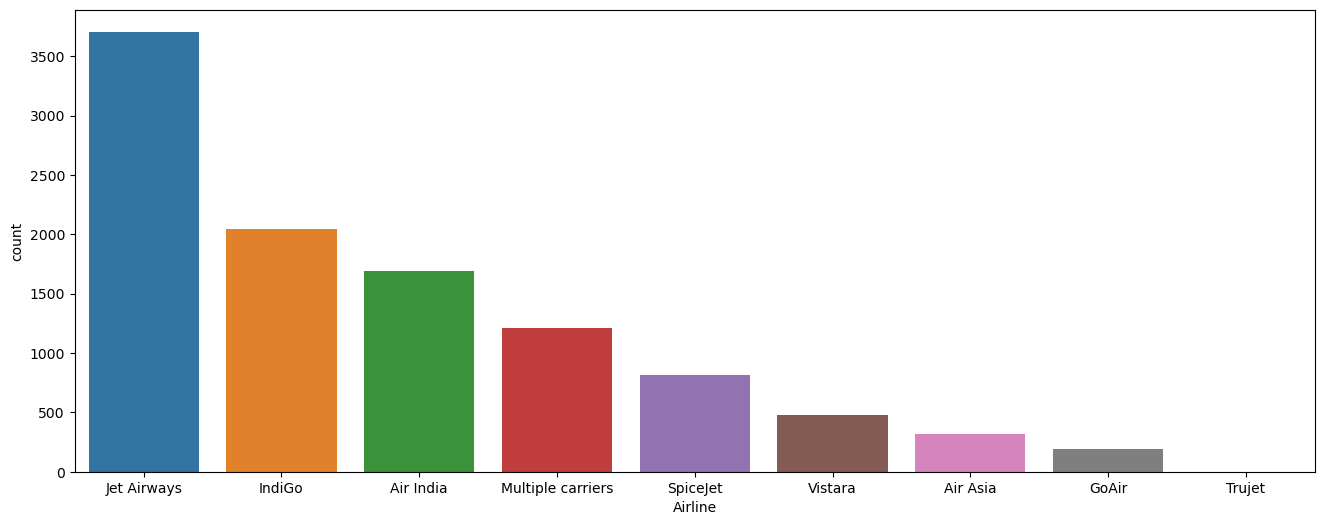

In [14]:
# Airlines distribution
plt.figure(figsize=(16,6))
print(data_eda["Airline"].value_counts())
sns.countplot(x='Airline', data=data_eda, order=data_eda["Airline"].value_counts().index)
plt.show()

Jet Airways is the crowd favorite Airline whereas Trujet is least.

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64


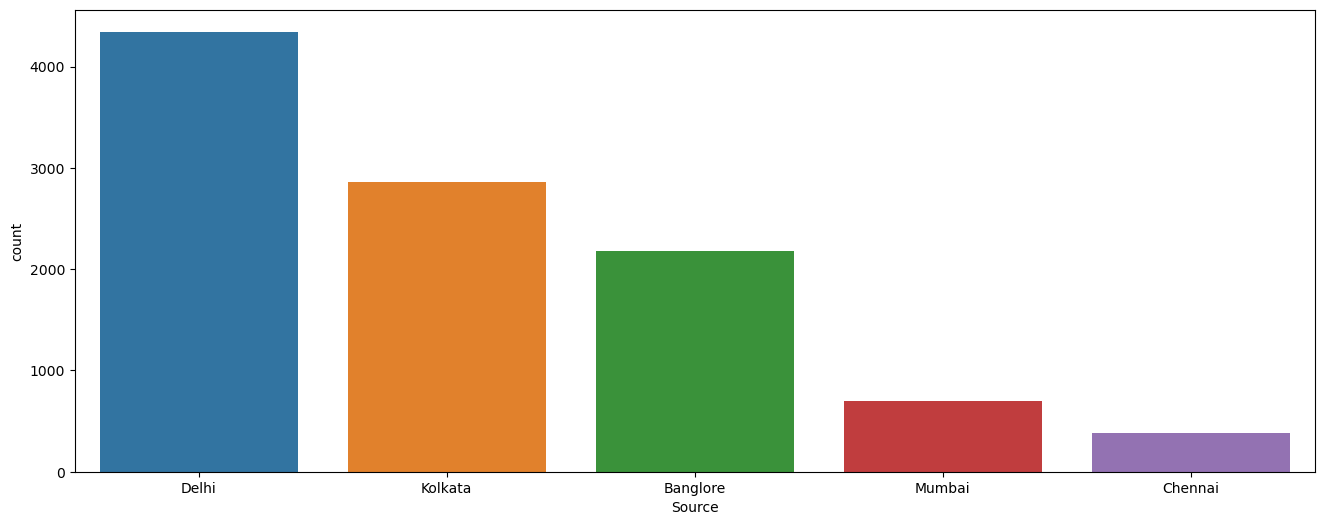

In [15]:
# Source Distribution
plt.figure(figsize=(16,6))
print(data_eda["Source"].value_counts())
sns.countplot(x='Source', data=data_eda, order=data_eda["Source"].value_counts().index)
plt.show()

Cochin       4345
Banglore     2860
Delhi        2179
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


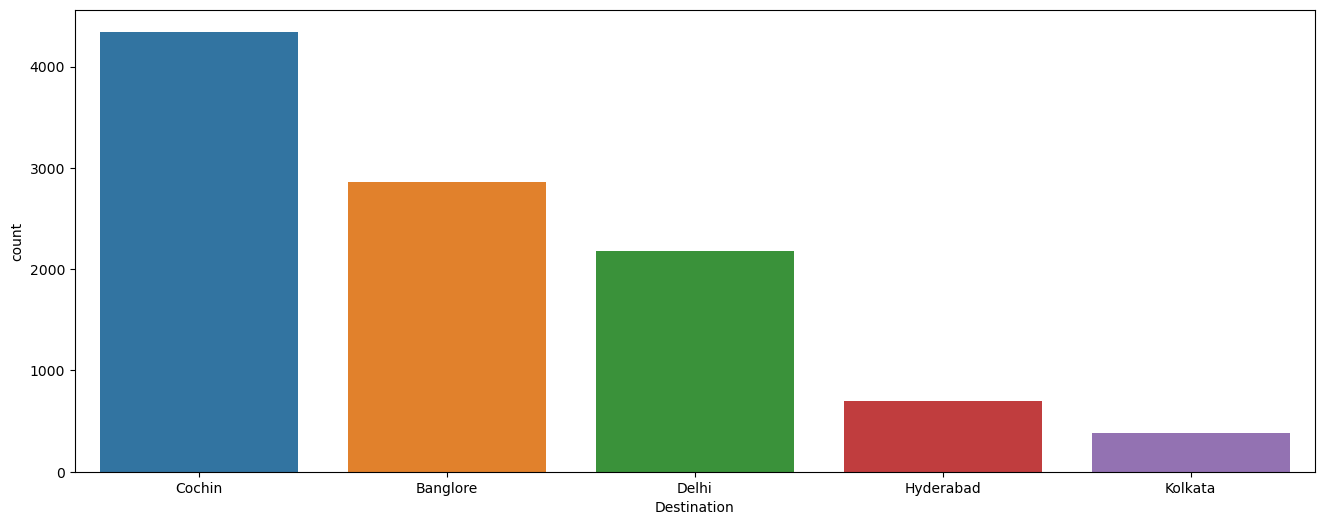

In [16]:
# Destination Distribution
plt.figure(figsize=(16,6))
print(data_eda["Destination"].value_counts())
sns.countplot(x='Destination', data=data_eda, order=data_eda["Destination"].value_counts().index)
plt.show()

Delhi is the departure point for the majority of flights, while Cochin serves as the most frequent destination for arriving flights.

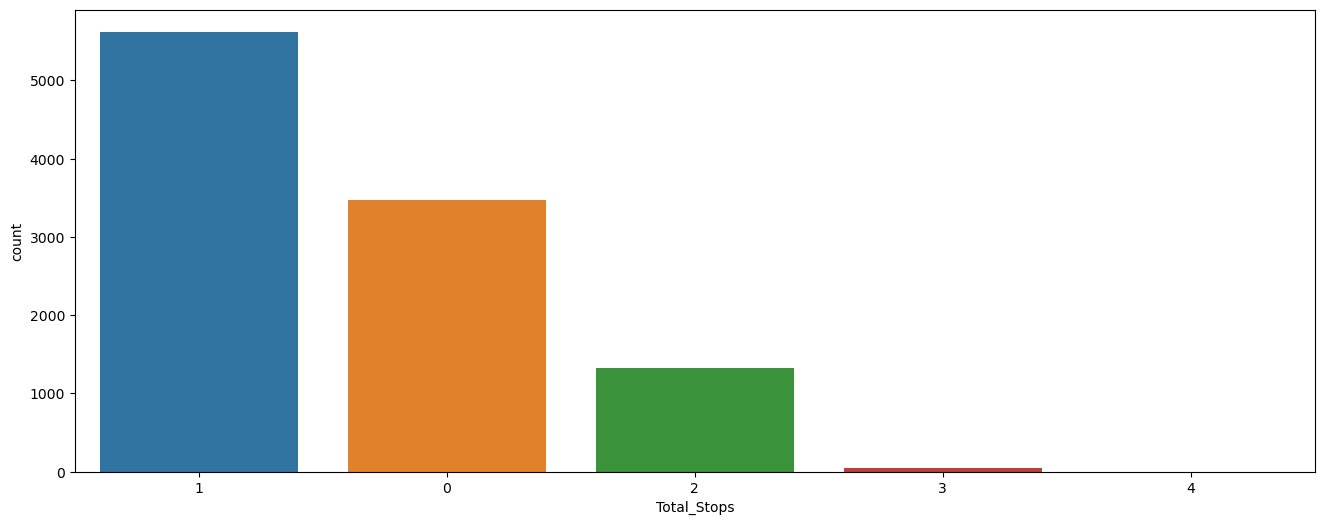

In [17]:
# Total Stops
plt.figure(figsize=(16,6))
#print(data_eda["Total_Stops"].value_counts())
sns.countplot(x='Total_Stops', data=data_eda, order=data_eda["Total_Stops"].value_counts().index)
plt.show()

Most of the people opt for 1 Stops given option people still go for direct flights.

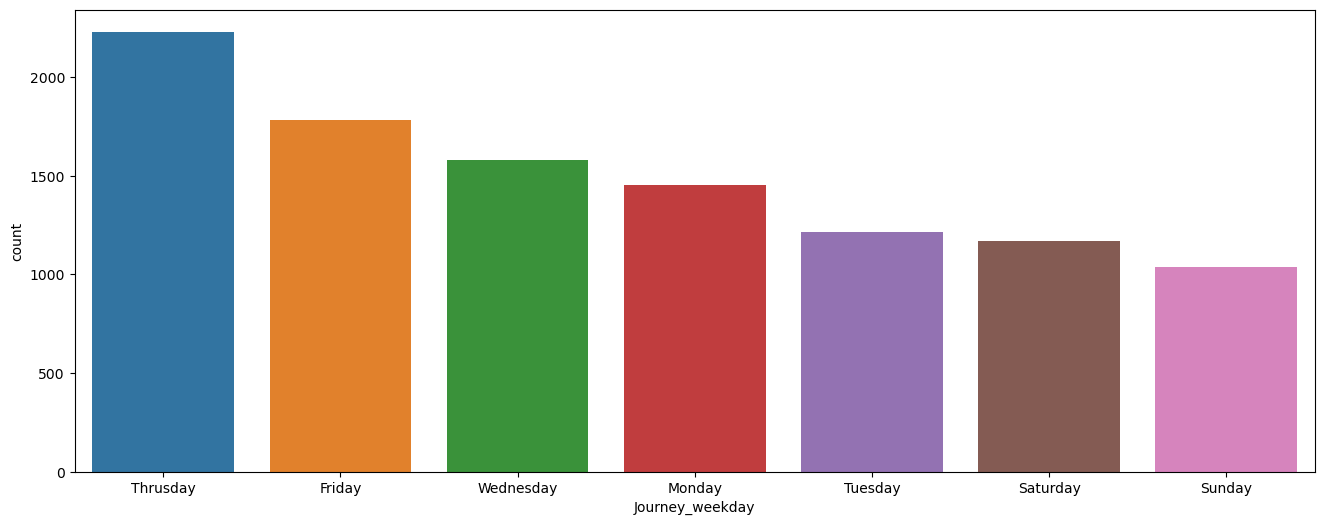

In [18]:
# Weekday
plt.figure(figsize=(16,6))
#print(data_eda["Journey_weekday"].value_counts())
ax = sns.countplot(x='Journey_weekday', data=data_eda, order=data_eda["Journey_weekday"].value_counts().index)
new_labels = ["Thrusday","Friday","Wednesday","Monday","Tuesday","Saturday","Sunday"]
ax.set_xticklabels(new_labels)
plt.show()

Looks like most of the flight are taken on the Thrusday followed by Friday.

6     2465
3     2169
5     2025
9     1375
1     1058
12     946
4      424
Name: Journey_Month, dtype: int64


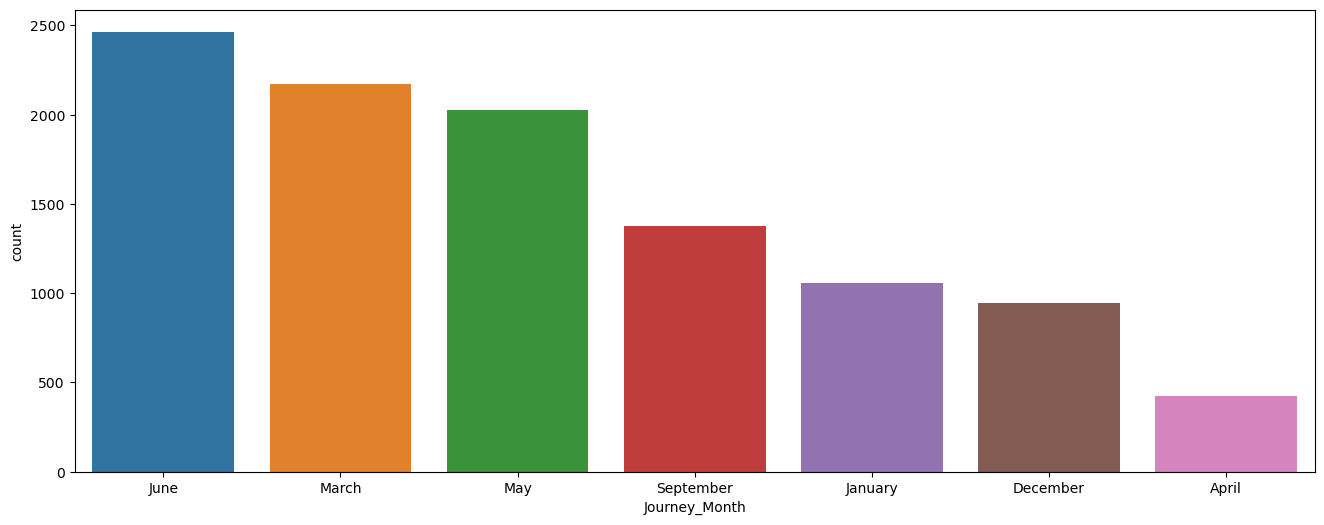

In [19]:
# Months
plt.figure(figsize=(16,6))
print(data_eda["Journey_Month"].value_counts())
ax = sns.countplot(x='Journey_Month', data=data_eda, order=data_eda["Journey_Month"].value_counts().index)
new_labels = ["June","March","May","September","January","December","April"]
ax.set_xticklabels(new_labels)
plt.show()

We can conclude from the above plot that June is the Busiest month followed by March and May.

**Bivariate Analysis**

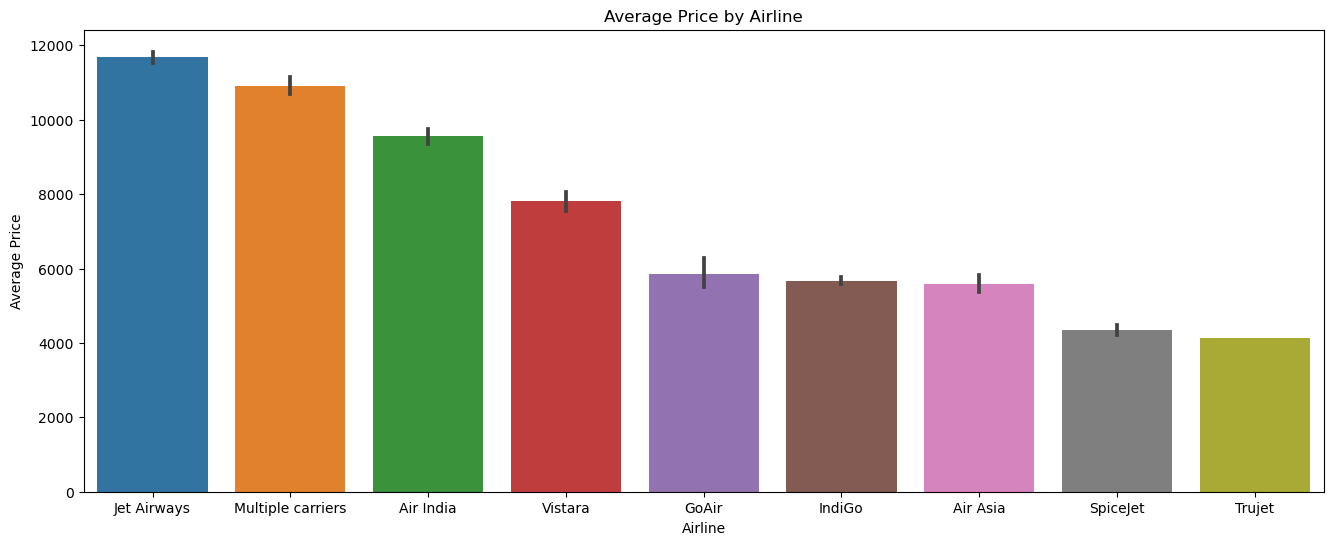

In [20]:
# Average Price distribution asper Airlines
plt.figure(figsize=(16,6))
sns.barplot(x="Airline",y="Price",data=data_eda,order=data.groupby(["Airline"])['Price'].mean().sort_values(ascending=False).index)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Average Price by Airline')
plt.show()

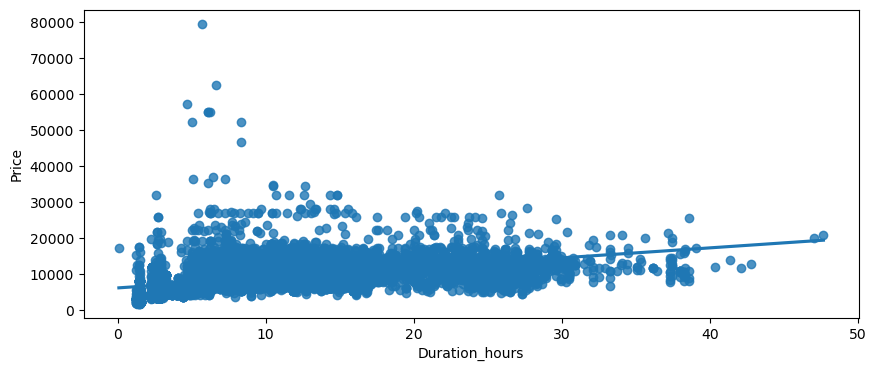

In [21]:
# plot for Flights Total Duration vs Price
plt.figure(figsize=(10,4))
sns.regplot(x="Duration_hours",y="Price",data=data_eda)
plt.show()

<Figure size 1000x400 with 0 Axes>

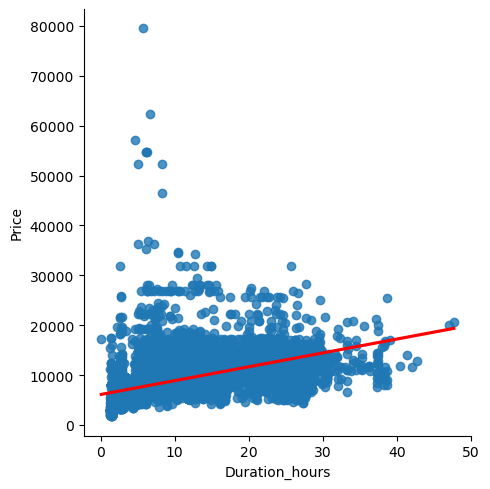

In [22]:
plt.figure(figsize=(10,4))
sns.lmplot(x="Duration_hours",y="Price",data=data_eda, line_kws={"color":"red"})
plt.show()

We can clearly see a trend as the duration of flights increases the Price also increases. The once with hiest prices over 50,000 seems to be urgent bookings.

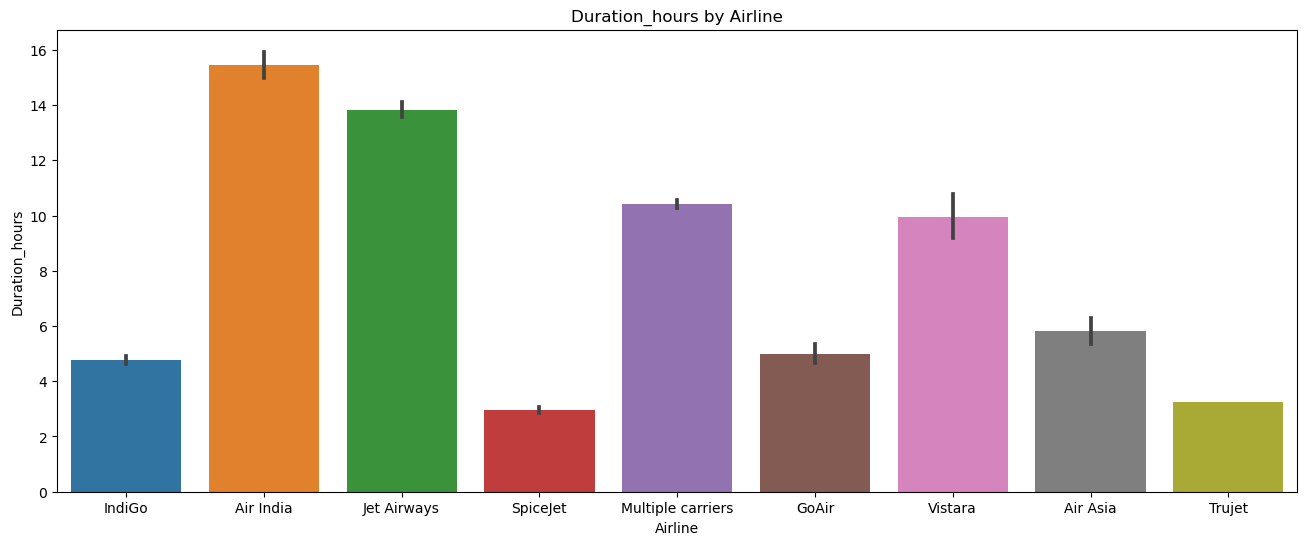

In [23]:
# Average Duration distribution by Airlines
plt.figure(figsize=(16,6))
sns.barplot(x="Airline",y="Duration_hours",data=data_eda)
plt.xlabel('Airline')
plt.ylabel('Duration_hours')
plt.title('Duration_hours by Airline')
plt.show()

             Airline  Duration_hours
0           Air Asia     1851.666667
1          Air India    26169.833333
2              GoAir      966.666667
3             IndiGo     9736.833333
4        Jet Airways    51272.416667
5  Multiple carriers    12605.083333
6           SpiceJet     2424.833333
7             Trujet        3.250000
8            Vistara     4782.333333


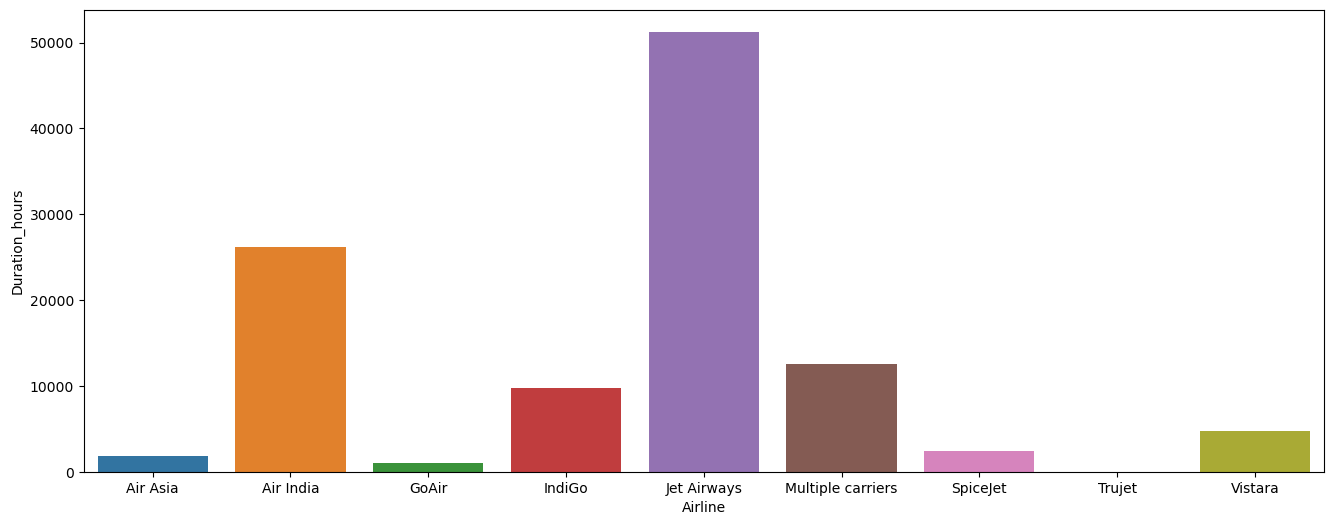

In [24]:
# Overall Duration Distribution by airline
airline_dur = data_eda.groupby("Airline")["Duration_hours"].sum().reset_index()
df = pd.DataFrame(airline_dur)
print(df)
plt.figure(figsize=(16,6))
sns.barplot(x="Airline",y="Duration_hours",data=df)
plt.show()

Overall Flight duration is most for Jet Airways but still most Average flight duration is for Air India Airlines.

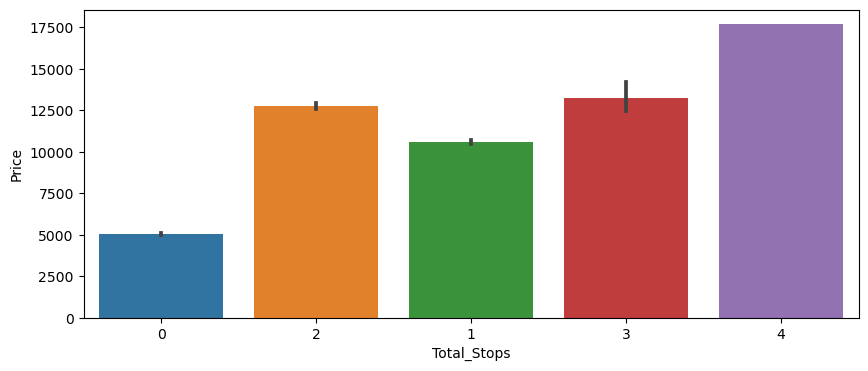

In [25]:
# plot for Price distribution as per Total Stops
plt.figure(figsize=(10,4))
sns.barplot(x="Total_Stops",y="Price",data=data_eda)
plt.show()

Total Stops is directly proportional to Price of flights.

<Axes: xlabel='Journey_Month', ylabel='Price'>

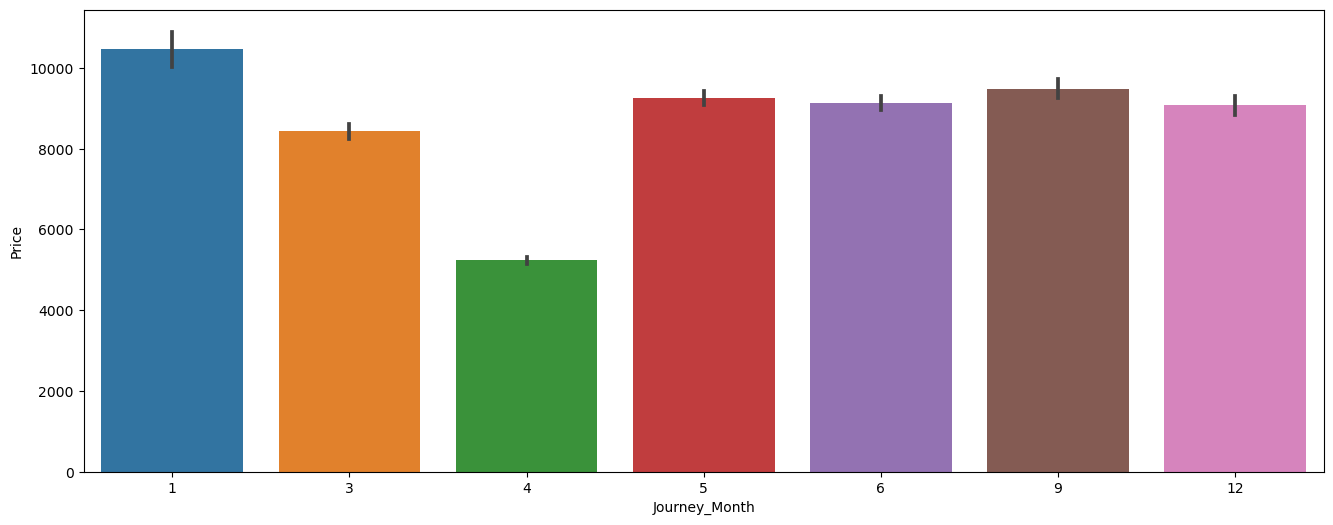

In [26]:
# Price variation by month
plt.figure(figsize=(16,6))
sns.barplot(x="Journey_Month",y="Price",data=data_eda)

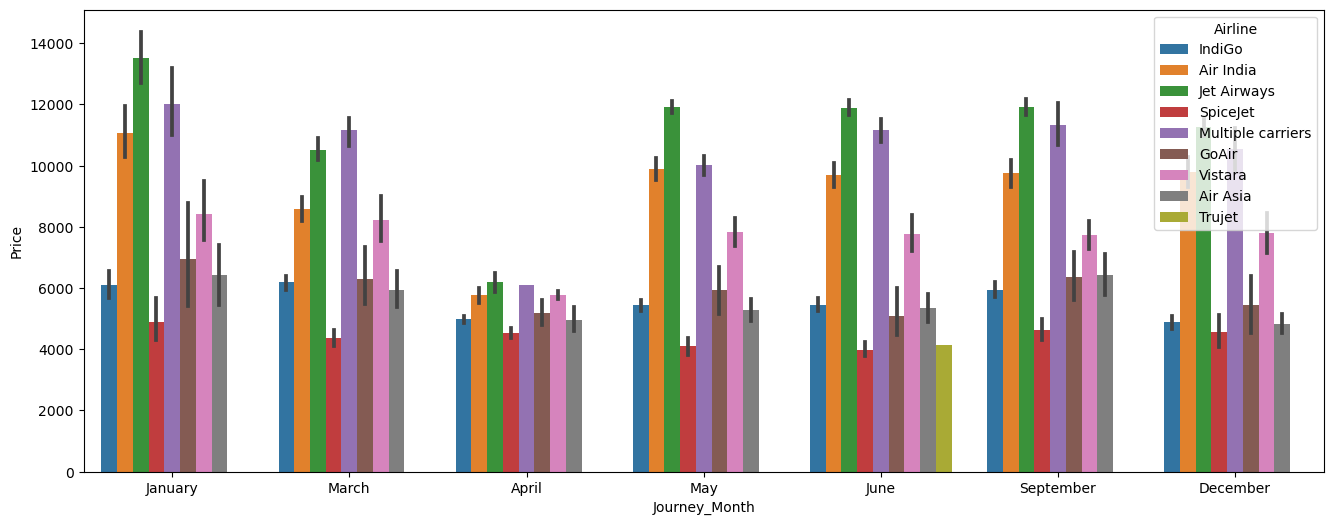

In [27]:
#Price variation by month in each Airlines
plt.figure(figsize=(16,6))
ax = sns.barplot(x="Journey_Month",y="Price", hue="Airline", data=data_eda)
new_labels = ["January","March","April","May","June","September","December"]
ax.set_xticklabels(new_labels)
plt.show()

Prices for each Airlines is higest in January and lowest is around April so its more affordable to travel by March or April.

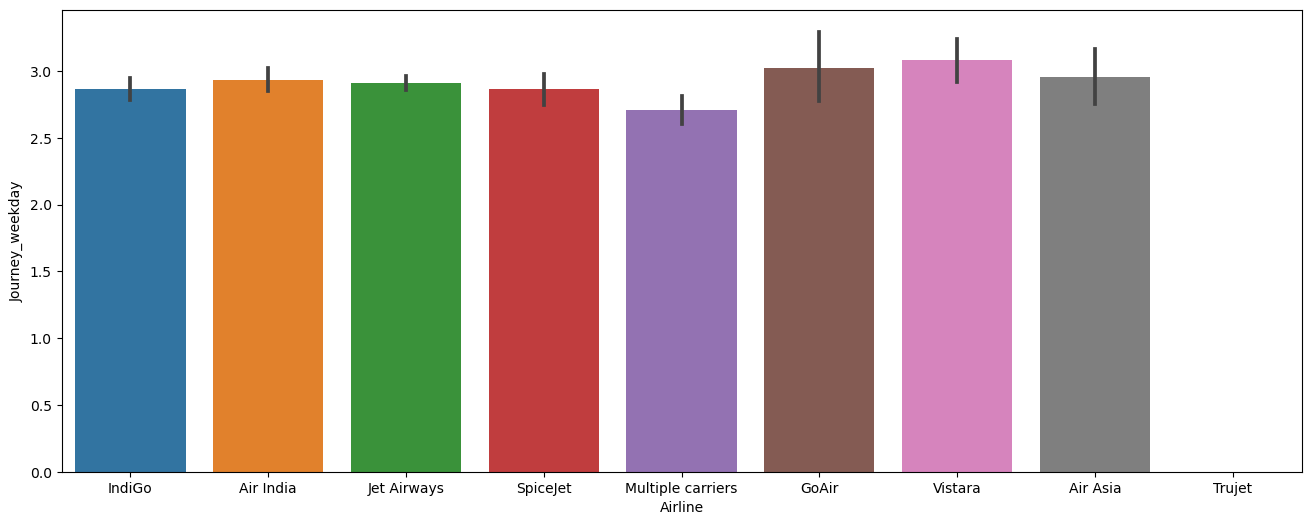

In [28]:
# plot for Travels in weekdays by Airlines
plt.figure(figsize=(16,6))
ax = sns.barplot(y="Journey_weekday", x="Airline", data=data_eda)
# new_labels = ["Monday","Tuesday","Wednesday","Thrusday","Friday","Saturday","Sunday"]
# ax.set_xticklabels(new_labels)
plt.show()

In [29]:
# plt.figure(figsize=(16,6))
# sns.swarmplot(x="Journey_weekday",y="Price",data=data_eda,hue="Airline")
# plt.show()

Thrusday Seems to be the Busiest day in the week.

1    5625
0    3475
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64


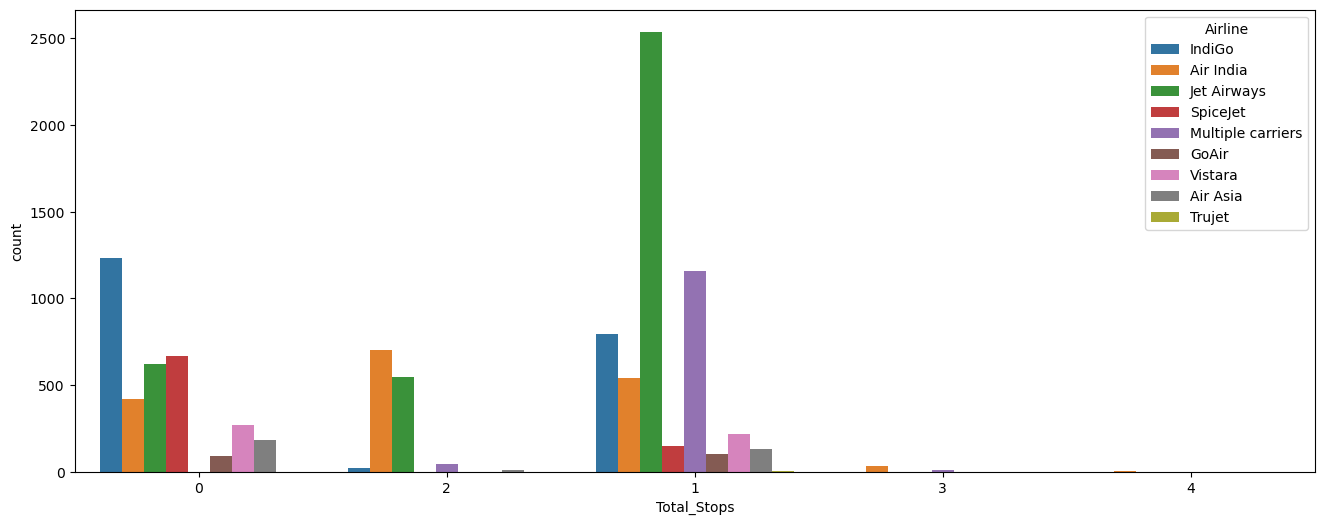

In [30]:
# Total Stops count asper Airlines
print(data_eda["Total_Stops"].value_counts())
plt.figure(figsize=(16,6))
sns.countplot(x="Total_Stops",hue="Airline",data=data_eda)
plt.show()

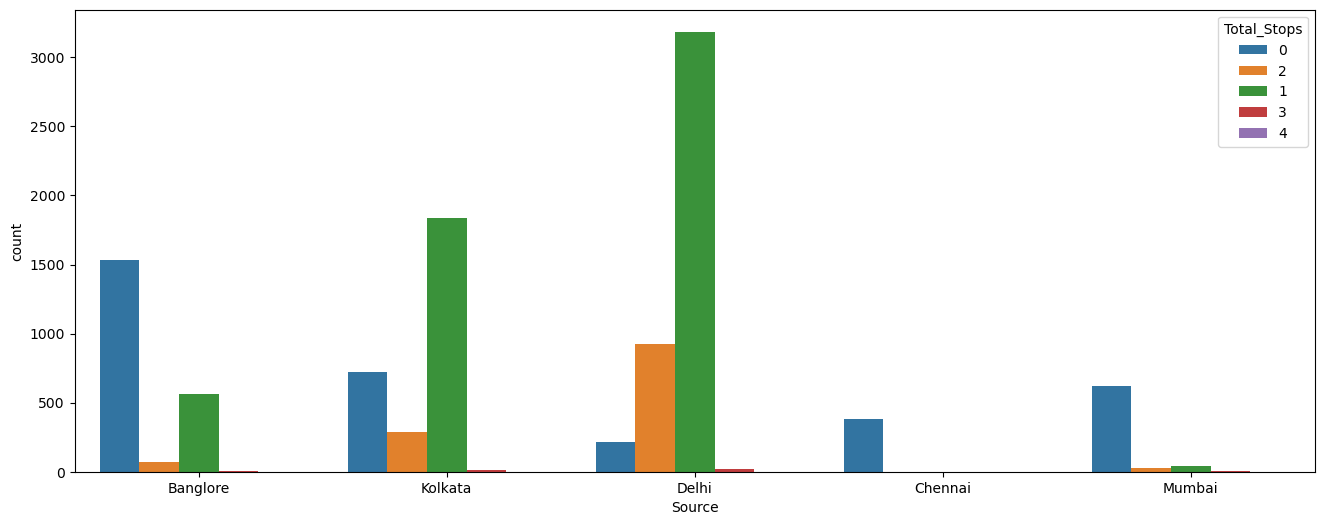

In [31]:
# 
plt.figure(figsize=(16,6))
sns.countplot(x='Source', hue='Total_Stops', data=data_eda)
plt.show()

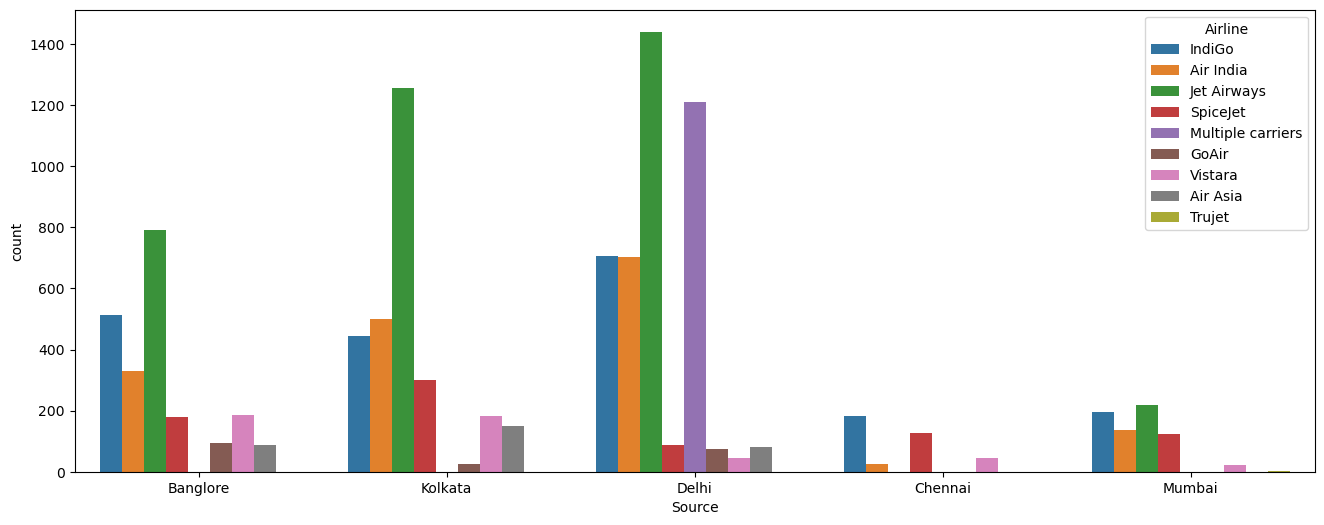

In [32]:
plt.figure(figsize=(16,6))
sns.countplot(x="Source",hue="Airline",data=data_eda)
plt.show()

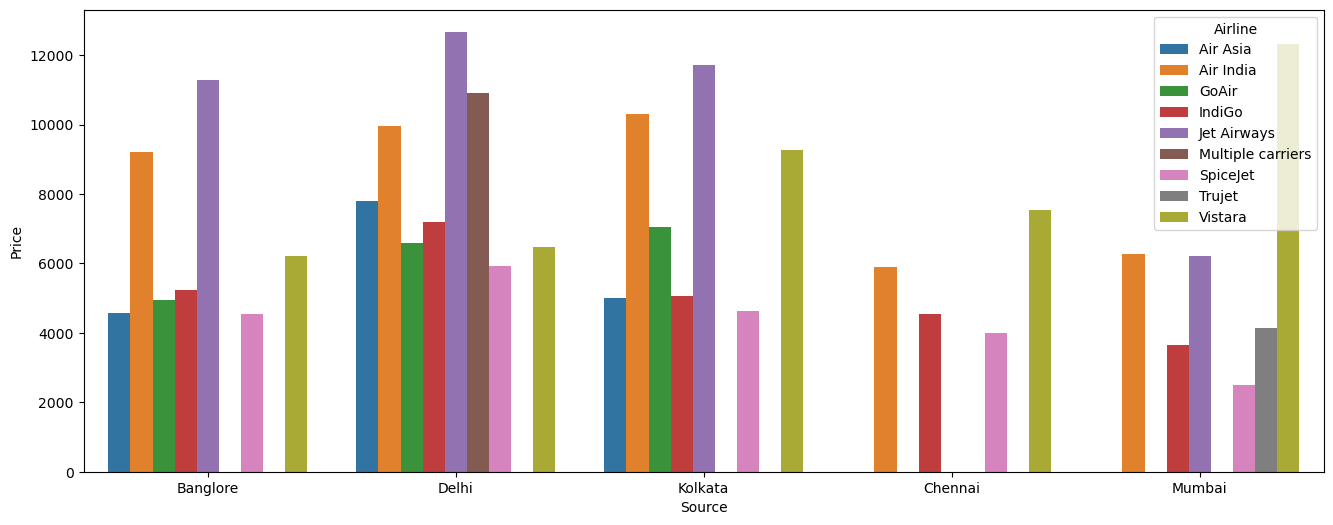

In [33]:
avg_prices = data_eda.groupby(['Airline', 'Source'])["Price"].mean().reset_index()
plt.figure(figsize=(16,6))
sns.barplot(x='Source', y='Price', hue='Airline', data=avg_prices)
plt.show()

As for example we can see about vistara , the more amount of flights available at a source makes its prices a little cheaper.

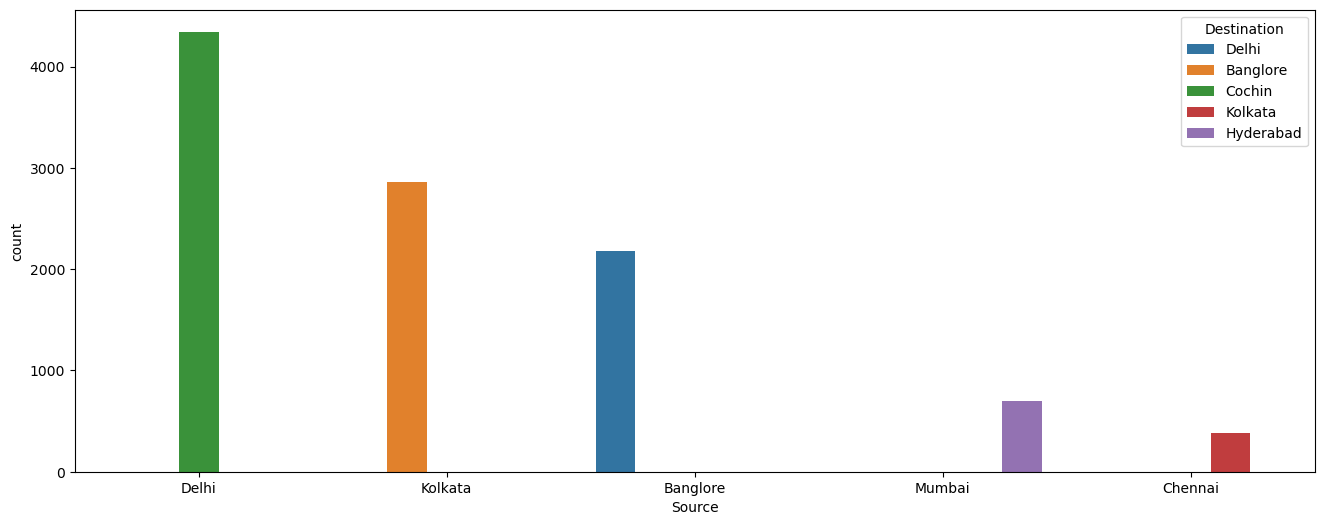

In [34]:
# Flights running from different Sources to Destinations
plt.figure(figsize=(16,6))
sns.countplot(x="Source", hue="Destination",data=data_eda, order=data_eda["Source"].value_counts().index)
plt.show()

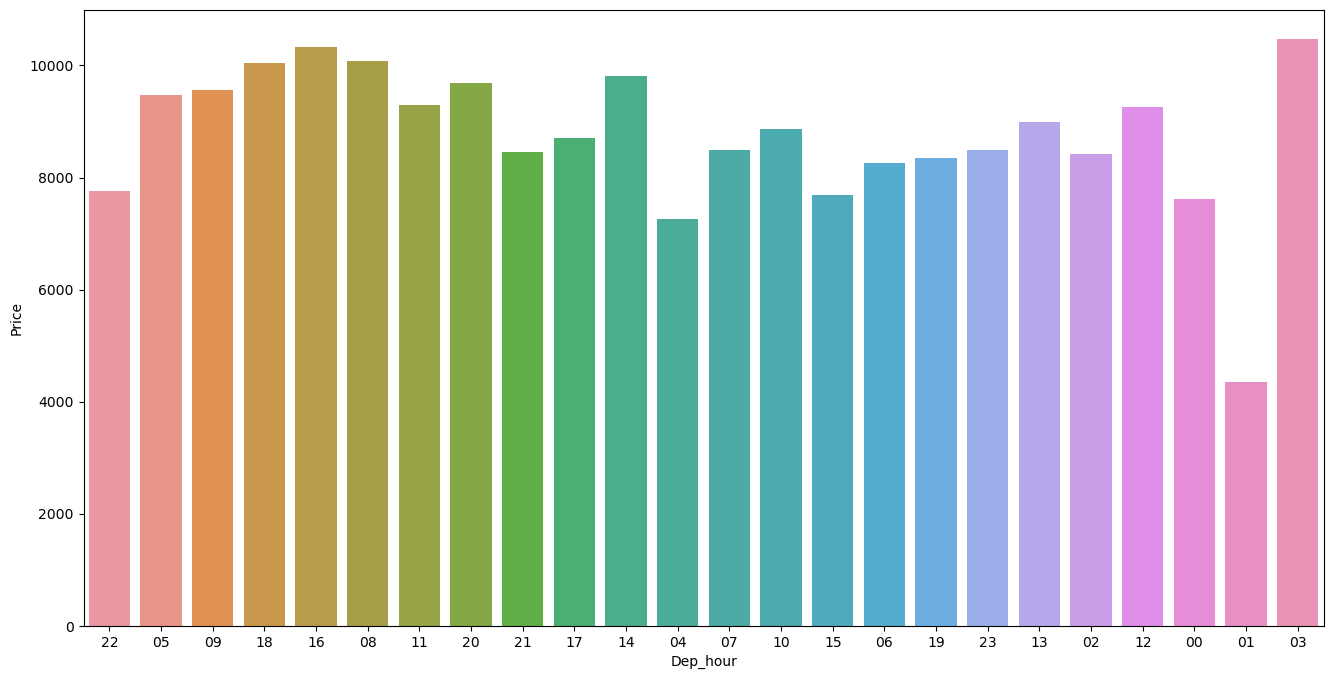

In [35]:
# Price vs Departure hours 
plt.figure(figsize=(16,8))
sns.barplot(x="Dep_hour", y="Price",data=data_eda,ci=None, )
plt.show()

Evening and night flights seems to be higher in price.

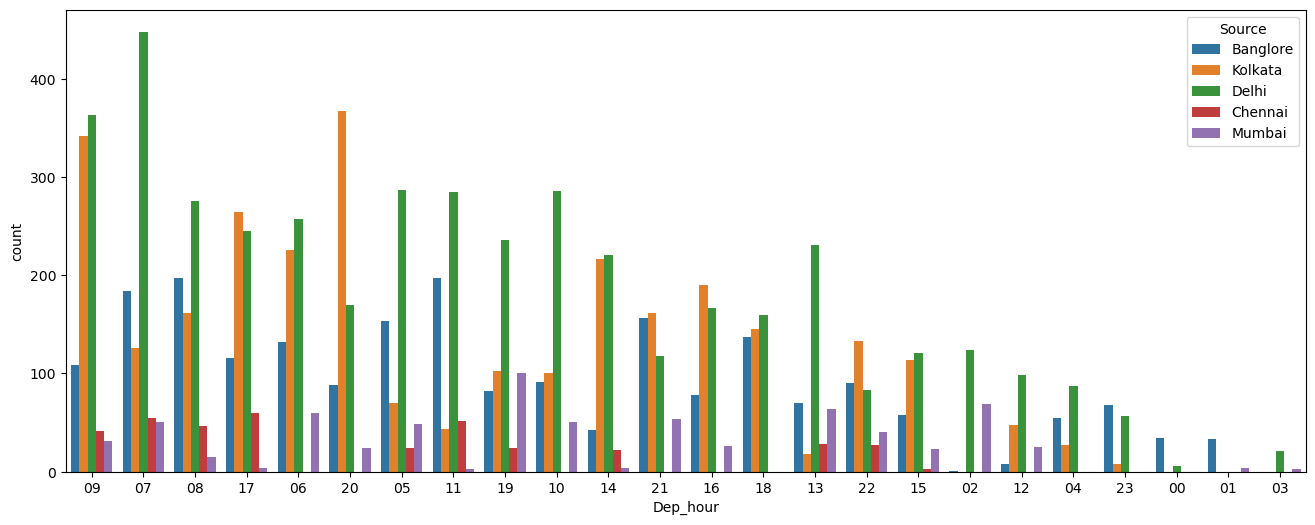

In [36]:
# Amount of Departures of flights from different Airports
plt.figure(figsize=(16,6))
sns.countplot(x='Dep_hour', hue='Source', data=data_eda, order=data_eda["Dep_hour"].value_counts().index)
plt.show()

In [37]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Duration                   10462 non-null  object 
 1   Total_Stops                10462 non-null  object 
 2   Price                      10462 non-null  int64  
 3   Journey_Day                10462 non-null  int64  
 4   Journey_Month              10462 non-null  int64  
 5   Journey_weekday            10462 non-null  int64  
 6   Dep_hour                   10462 non-null  object 
 7   Dep_min                    10462 non-null  object 
 8   Arrival_hour               10462 non-null  object 
 9   Arrival_min                10462 non-null  object 
 10  Duration_hours             10462 non-null  float64
 11  Airline_Air India          10462 non-null  uint8  
 12  Airline_GoAir              10462 non-null  uint8  
 13  Airline_IndiGo             10462 non-null  uin

In [39]:
X = data_model.drop(["Price",'Duration'],axis=1)
y = data_model["Price"]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
extractor = ExtraTreesRegressor()

In [44]:
extractor.fit(X_train, y_train)

ExtraTreesRegressor()

In [45]:
x_columns = X_train.columns
feature_rank = pd.DataFrame({"Feature": x_columns , "importance": extractor.feature_importances_})

In [46]:
feature_rank = feature_rank.sort_values('importance', ascending=False)

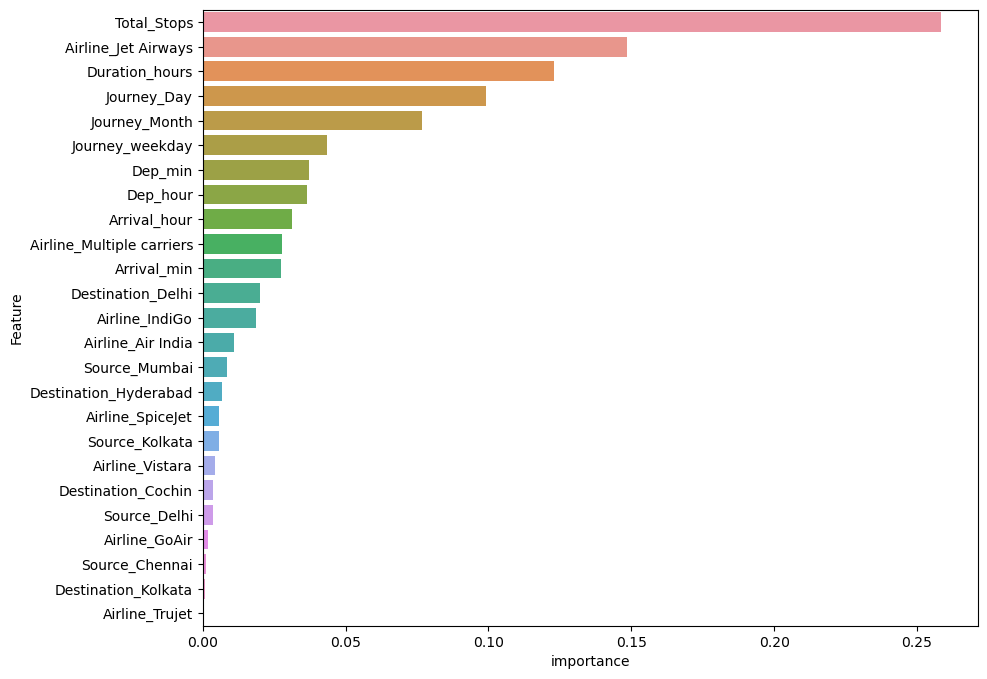

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(x="importance", y = "Feature", data= feature_rank)
plt.show()

In [50]:
feature_rank["cumsum"] = feature_rank["importance"].cumsum()*100

In [53]:
feature_rank

,Feature,importance,cumsum
0,Total_Stops,0.258352,25.835247
12,Airline_Jet Airways,0.148499,40.685182
8,Duration_hours,0.122925,52.977653
1,Journey_Day,0.098993,62.876934
2,Journey_Month,0.076657,70.542646
3,Journey_weekday,0.043473,74.889936
5,Dep_min,0.037140,78.603903
4,Dep_hour,0.036448,82.248661
6,Arrival_hour,0.031160,85.364665
13,Airline_Multiple carriers,0.027714,88.136095


In [54]:
# Model Building

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [60]:
def predict(ml_model):
    print(f"Model name is : {ml_model}")
    model = ml_model.fit(X_train, y_train)
    print(f"Training Score is : {model.score(X_train,y_train)}")
    
    predictions = model.predict(X_test)
    
    r2score = r2_score(y_test, predictions)
    print(f"R2 Score is : {r2score}")
    
    print(f"MAE : {mean_absolute_error(y_test,predictions)}")
    print(f"MSE : {mean_squared_error(y_test,predictions)}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y_test,predictions))}")

In [61]:
predict(LinearRegression())

Model name is : LinearRegression()
Training Score is : 0.5442219232600805
R2 Score is : 0.5470864540232889
MAE : 2115.591197920802
MSE : 9443372.608912736
RMSE : 3073.0070954868843


In [62]:
predict(DecisionTreeRegressor())

Model name is : DecisionTreeRegressor()
Training Score is : 0.969740512514991
R2 Score is : 0.6882247549998783
MAE : 1387.7496814779424
MSE : 6500600.026042496
RMSE : 2549.6274288692643


In [63]:
predict(RandomForestRegressor())

Model name is : RandomForestRegressor()
Training Score is : 0.9504338806693052
R2 Score is : 0.8037141758203306
MAE : 1190.1413922033798
MSE : 4092613.68321155
RMSE : 2023.0209299983899


In [66]:
predict(XGBRegressor())

Model name is : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Total_Stops: object, Dep_hour: object, Dep_min: object, Arrival_hour: object, Arrival_min: object

In [70]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators' :[100,200,300,400,500], 'max_features' :["auto", "sqrt"], "max_depth": [5,10,15,20]}
rf = RandomForestRegressor()
rf_cv = RandomizedSearchCV(rf, params, cv=10, verbose=True, n_jobs=-1)
rf_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=True)

In [71]:
rf_cv.best_params_

{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 15}

In [72]:
predict(RandomForestRegressor(n_estimators= 100, max_features= 'sqrt', max_depth= 15))

Model name is : RandomForestRegressor(max_depth=15, max_features='sqrt')
Training Score is : 0.9238113333566151
R2 Score is : 0.8215086351459067
MAE : 1239.803353197595
MSE : 3721594.2882778496
RMSE : 1929.1434079087664
